In [72]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import sklearn.tree as sk_tree


In [73]:
def convert_to_numeric_values(df):
    covnerted_df = df.copy()
    covnerted_df = covnerted_df.replace(
        {
            "history": {"bad": 0, "fair": 1, "excellent": 2},
            "income": {"low": 0, "high": 1},
            "term": {3: 0, 10: 1},
            "risk": {"low": 0, "high": 1}
        }
    )
    return covnerted_df

In [74]:
plt.figure(figsize=(12,8))

loans_df = pd.read_csv(r'https://raw.githubusercontent.com/AndriiLatysh/ml_4/master/data/loans.csv')
numeric_loans_df = convert_to_numeric_values(loans_df)

print(numeric_loans_df)

   history  term  income  risk
0        2     0       1     0
1        1     1       0     1
2        1     0       1     0
3        0     1       1     1
4        2     0       0     0
5        1     1       1     0
6        0     0       1     0
7        0     1       0     1
8        2     1       0     0


<Figure size 864x576 with 0 Axes>

In [75]:
feature_names = loans_df.columns.values[:-1]
X = numeric_loans_df[feature_names]
y = numeric_loans_df["risk"]


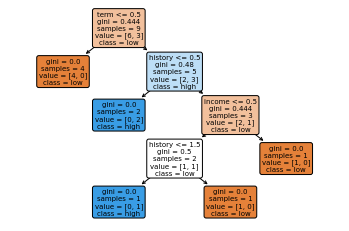

In [76]:
loan_decision_tree = sk_tree.DecisionTreeClassifier()
loan_decision_tree.fit(X, y)
sk_tree.plot_tree(
    loan_decision_tree, feature_names=feature_names, 
    class_names=["low", "high"], filled=True, rounded=True)
plt.show()


Tree
Accurance: 0.703125
[[99 32]
 [25 36]]

Forest
Accurance: 0.78125
[[113  18]
 [ 24  37]]


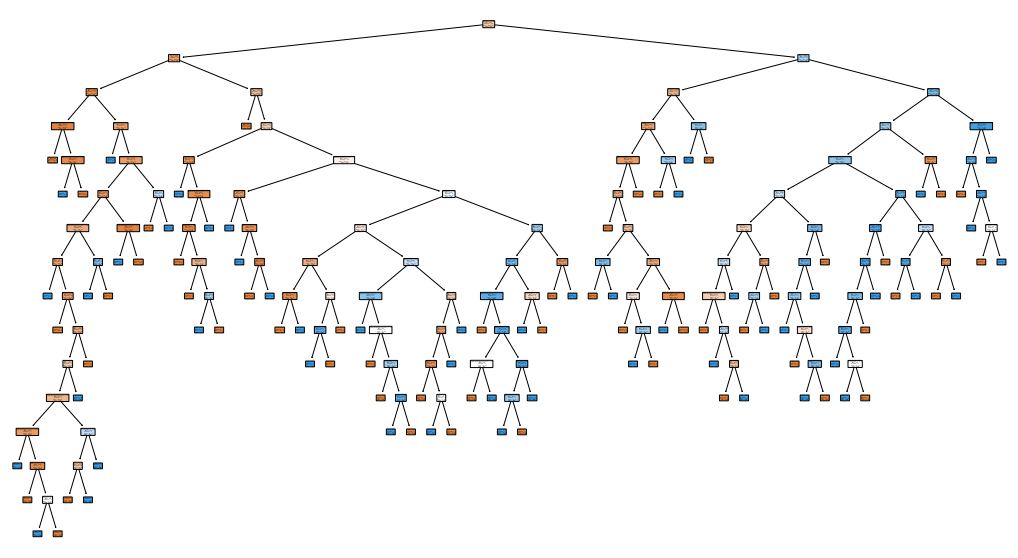

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.tree as sk_tree
import sklearn.model_selection as sk_model_selection
import sklearn.metrics as sk_metrics
import sklearn.ensemble as sk_ensemble


plt.figure(figsize=(18, 10))

diabets_df = pd.read_csv(r"https://raw.githubusercontent.com/AndriiLatysh/ml_4/master/data/pima-indians-diabetes.csv")

column_names = diabets_df.columns.values

X = diabets_df[column_names[:-1]]
y = diabets_df[column_names[-1]]

X_train, X_test, y_train, y_test = sk_model_selection.train_test_split(X, y)

print("Tree")

diabetes_tree_model = sk_tree.DecisionTreeClassifier()
# diabetes_tree_model = sk_tree.DecisionTreeClassifier(max_depth=4)
diabetes_tree_model.fit(X_train, y_train)

tree_y_prediction = diabetes_tree_model.predict(X_test)

print("Accurance: {}".format(sk_metrics.accuracy_score(y_test, tree_y_prediction)))

tree_confusion_matrix = sk_metrics.confusion_matrix(y_test, tree_y_prediction)
print(tree_confusion_matrix)

sk_tree.plot_tree(
    diabetes_tree_model, feature_names=column_names, 
    class_names=["low", "high"], filled=True, rounded=True)
print()
# plt.show()

print("Forest")

diabetes_forest_model = sk_ensemble.RandomForestClassifier(n_jobs=-1)
diabetes_forest_model.fit(X_train, y_train)

forest_y_prediction = diabetes_forest_model.predict(X_test)

print("Accurance: {}".format(sk_metrics.accuracy_score(y_test, forest_y_prediction)))

forest_confusion_matrix = sk_metrics.confusion_matrix(y_test, forest_y_prediction)
print(forest_confusion_matrix)